<a href="https://colab.research.google.com/github/Otgonbtr/Dive_into_code/blob/main/Wheat_chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wheat in 4 squares (List) : [1, 2, 4, 8]
Wheat in 4 squares (ndarray) : [1 2 4 8]
Wheat in 2x2 chessboard : [[1 2]
 [4 8]]
Number of wheats on the 8x8 wheats : 1.8446744073709552e+19


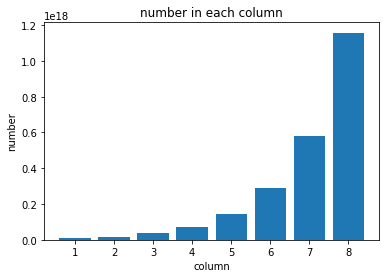

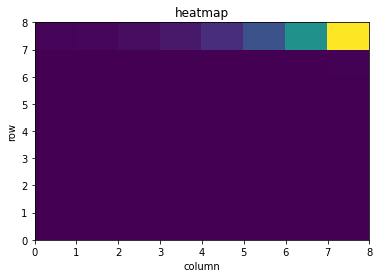

first half wheat : 4294967295
secend_half wheat : 8589934591
second half rice is 2.0000000002328306 times more than the first half.
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19


In [31]:
import numpy as np
import matplotlib.pyplot as plt
row = 8
column = 8

####### Sample code #########
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
  small_board_list.append(2*small_board_list[-1])
print("Wheat in {} squares (List) : {}".format(n_squares,small_board_list))

small_board_ndarray = np.array(small_board_list)
print("Wheat in {} squares (ndarray) : {}".format(n_squares,small_board_ndarray))

######### Problem 1 ############
# Number of wheat on a 2x2 chessboard

two_x_two_board_ndarray = small_board_ndarray.reshape(2,2)
print("Wheat in 2x2 chessboard : {}".format(two_x_two_board_ndarray))

########## Problem 2 ###########
# Extension to nxm mass

def N_M_size_wheat_chessboard(row,column):
  n_squares = row*column
  board_list = [1]

  for _ in range(n_squares-1):
    board_list.append(2*board_list[-1])
  
  board_nparray = np.array(board_list)
  board_nparray = board_nparray.reshape(row,column)
  return board_nparray
board_array = N_M_size_wheat_chessboard(row,column)
n_wheat_sum = np.sum(board_array)
print("Number of wheats on the {}x{} wheats : {}".format(row,column,n_wheat_sum))


######### Problem 3 #############
# Total number of wheat.

%matplotlib inline
column_avg = (board_array.sum(axis=0))/column
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,column+1),column_avg)
plt.show()

######### Problem 4 #############
# Heatmap of the number of wheat

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor((board_array))
plt.show()

######### Problem 5 #############
# The second half is several times larger than the first half.

# first_half_wheat = np.sum(board_array[0:3,:])
# second_half_wheat = np.sum(board_array[4:7,:])

def N_M_size_wheat_half(row,column):
  n_squares = np.int64(row*column/2)
  first_half_list = [1]
  for _ in range(n_squares-1):
    first_half_list.append(2*first_half_list[-1])
  first_half_wheat_sum = np.sum(first_half_list)

  second_half_list = [-first_half_wheat_sum]
  for _ in range(n_squares-1):
    second_half_list.append(2*second_half_list[-1])

  first_half_wheat_sum = np.sum(first_half_list)
  second_half_wheat_sum = np.sum(second_half_list)

  return first_half_wheat_sum , second_half_wheat_sum

first_half , second_half = N_M_size_wheat_half(row,column)
print("first half wheat : {}".format(first_half))
print("secend_half wheat : {}".format(second_half))
print("second half rice is {} times more than the first half.".format(second_half/first_half))

######### Problem 6 #############
''' 
"sample code (np.append())"

n_squares = 4
small_board_nparray = np.array([1])
for _ in (n_squares-1):
  small_board_ndarray = np.append(small_board_ndarray,2*small_board_ndarray[-1])
print("Wheat in {} squares (List) : {}".format(n_squares,small_board_ndarray))

"Sample code (Broadcast)"
np_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indeces_of_squares
print("Wheat in {} squares (List) : {}".format(n_squares,small_board_ndarray))

indices_of_squares = np.arange(n_squares).astype(np.uint64)
'''
def wheat_chessboard_broadcast(row,column):
  n_squares = row*column
  indices_of_squares = np.arange(n_squares).astype(np.uint64)
  board_array = 2**indices_of_squares
  board_array = board_array.reshape(row,column)
  return board_array
board_array = wheat_chessboard_broadcast(row,column)
sum_wheat = np.sum(board_array)
print('"Broadcast" Number of wheat on the {} x {} board : {}'.format(row,column,sum_wheat))

def wheat_chessboard_npappend(row,column):
  n_squares = row*column
  board_ndarray = np.array([1]).astype(np.uint64)
  for _ in range(n_squares-1):
    board_ndarray = np.append(board_ndarray,2*board_ndarray[-1])
  board_ndarray = board_ndarray.reshape(row,column)
  return board_ndarray
board_ndarray = wheat_chessboard_npappend(row,column)
sum_wheat_npappend = np.sum(board_ndarray)
print('"np.append" Number of wheat on the {} x {} board : {}'.format(row,column,sum_wheat_npappend))

# Problem 7

In [32]:
%%timeit
def N_M_size_wheat_chessboard(row,column):
  n_squares = row*column
  board_list = [1]

  for _ in range(n_squares-1):
    board_list.append(2*board_list[-1])
  
  board_nparray = np.array(board_list)
  board_nparray = board_nparray.reshape(row,column)
  return board_nparray
board_array = N_M_size_wheat_chessboard(row,column)
n_wheat_sum = np.sum(board_array)
print("(List) Number of wheats on the {}x{} wheats : {}".format(row,column,n_wheat_sum))

Streaming output truncated to the last 5000 lines.
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Number of wheats on the 8x8 wheats : 1.8446744073709552e+19
(List) Numb

In [33]:
%%timeit
def wheat_chessboard_broadcast(row,column):
  n_squares = row*column
  indices_of_squares = np.arange(n_squares).astype(np.uint64)
  board_array = 2**indices_of_squares
  board_array = board_array.reshape(row,column)
  return board_array
board_array = wheat_chessboard_broadcast(row,column)
sum_wheat = np.sum(board_array)
print('"Broadcast" Number of wheat on the {} x {} board : {}'.format(row,column,sum_wheat))

Streaming output truncated to the last 5000 lines.
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 8 board : 18446744073709551615
"Broadcast" Number of wheat on the 8 x 

In [30]:
%%timeit
def wheat_chessboard_npappend(row,column):
  n_squares = row*column
  board_ndarray = np.array([1]).astype(np.uint64)
  for _ in range(n_squares-1):
    board_ndarray = np.append(board_ndarray,2*board_ndarray[-1])
  board_ndarray = board_ndarray.reshape(row,column)
  return board_ndarray
board_ndarray = wheat_chessboard_npappend(row,column)
sum_wheat_npappend = np.sum(board_ndarray)
print('"np.append" Number of wheat on the {} x {} board : {}'.format(row,column,sum_wheat_npappend))

Streaming output truncated to the last 5000 lines.
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" Number of wheat on the 8 x 8 board : 1.8446744073709552e+19
"np.append" N